In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

<img src="./img/Circuit.png" style="width: 50%; height: 50%"> </img>

<img src="./img/treqs.png" style="width: 30%; height: 30%"> </img>

In [4]:
def CPEfun(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + Qx*(np.pi*2*freq*1j)**px)
    return out

def CPEfunElec(Rx, Qx, pex, pix, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = 1./(1./Rx + (1j)**pix*Qx*(np.pi*2*freq)**pex)
    return out

def CPEfunSeries(Rx, Qx, px, freq):
    out = np.zeros_like(freq, dtype=complex128)
    out = Rx + 1./(Qx*(np.pi*2*freq*1j)**px)
    return out

In [5]:
pathforPK = "/Users/sgkang/Google Drive/Zarcfit/nt01223.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"
temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [6]:
name = "NT01223"

In [7]:
R0 = data_active[data['0LabID (PCG)'] == name]['Ro'].values[0]
Rinf = data_active[data['0LabID (PCG)'] == name]['Rinf'].values[0]

/Users/sgkang/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [8]:
Rh = data_active[data['0LabID (PCG)'] == name]['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == name]['Qh'].values[0]
pRh = data_active[data['0LabID (PCG)'] == name]['pRh'].values[0]
pQh = data_active[data['0LabID (PCG)'] == name]['pQh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == name]['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == name]['Fh'].values[0]
Rl = data_active[data['0LabID (PCG)'] == name]['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == name]['Ql'].values[0]
pRl = data_active[data['0LabID (PCG)'] == name]['pRl'].values[0]
pQl = data_active[data['0LabID (PCG)'] == name]['pQl'].values[0]
Pl = data_active[data['0LabID (PCG)'] == name]['Pl'].values[0]
Re = data_active[data['0LabID (PCG)'] == name]['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == name]['Qe'].values[0]
Pef = data_active[data['0LabID (PCG)'] == name]['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == name]['Pe-i'].values[0]

In [9]:
print Rh, Qh, pRh, pQh

750.9 3.159e-10 100.8 2.519e-10


In [10]:
print Rh, Qh, pRh, pQh

750.9 3.159e-10 100.8 2.519e-10


In [11]:
# pathforPK = "/Users/sgkang/Google Drive/Zarcfit/nt01223.z"
# pathfordata = "../data/Kimberlite-2015-07-17.xls"
# temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")

In [12]:
data_active[data['Facies'] == 'XVK']

,Facies,0LabID (PCG),Peregrine ID,(Latitude),(Longitude),Depth (m),Mag Susc [SI],Resistivity [Ohm.m],Geometric Factor [m],Sat Geometric Dens [g/cc],...,Rl,Ql,Pl,Fl,pRl,pQl,Re,Qe,Pe-f,Pe-i
43,XVK,NT01222,K2P-0017,64.332627,-109.816663,174.1,0.000582,17.317279,0.021990,2.258028,...,302,5.039e-06,0.6464,3635,1272,7.383e-07,10000000000,0.005847,0.3518,0.7189
45,XVK,NT01223,K2P-0020,64.332627,-109.816663,204.5,0.000636,31.009713,0.021792,2.287620,...,582.8,3.038e-06,0.6517,2656,2058,5.084e-07,10000000000,0.003093,0.2073,-2.149
47,XVK,NT01224,K2P-0024,64.332627,-109.816663,235.0,0.000951,56.755824,0.021474,1.976504,...,1193,3.057e-06,0.5644,3322,3226,6.21e-07,10000000000,0.00097,0.1622,-2.037
49,XVK,NT01225,K2P-0031,64.332627,-109.816663,298.7,0.000287,15.608231,0.022568,2.218582,...,404.3,4.406e-06,0.6611,2293,499,1.492e-06,10000000000,0.005015,0.1692,-2.215
55,XVK,NT01228,K2P-0077,NaN,NaN,117.4,0.001884,77.892755,0.022312,2.416544,...,689.7,1.121e-05,0.5675,837.3,14210,4.365e-07,10000000000,0.001363,0.66,-2.347
57,XVK,NT01229,K2P-0147,64.332107,-109.815671,169.7,0.000851,15.092644,0.024129,2.005562,...,409.2,4.285e-06,0.6811,1771,339.6,1.809e-06,10000000000,0.006881,0.2626,0.6353
59,XVK,NT01230,K2P-0157,64.332107,-109.815671,265.9,0.001072,81.146257,0.025534,1.562988,...,1715,1.801e-06,0.5704,4005,2725,5.228e-07,10000000000,0.002796,0.1696,0.6351
60,XVK,NT01230,K2P-0157,64.332107,-109.815671,265.9,0.001110,49.144266,0.021891,1.747999,...,1008,4.69e-06,0.5254,4242,2767,9.43e-07,10000000000,0.008176,0.167,0.6575


(1.5463669782962151, 1.9203195585966315)

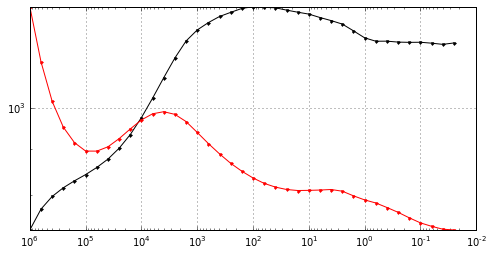

In [13]:
import scipy as sp
amp = lambda x, y: np.sqrt(x**2+y**2)
fig = plt.figure(figsize = (8, 4))
frequency = temp[:,0].copy()
ax = plt.subplot(111)
ax1 = ax.twinx()
ax.loglog(temp[:,0], amp(temp[:,4], temp[:,5]), 'k.-')
ax1.loglog(temp[:,0], sp.arctan2(temp[:,4], temp[:,5]), 'r.-')
ax.invert_xaxis()
ax.grid(True)
ax.set_ylim(amp(temp[:,4], temp[:,5]).min(), amp(temp[:,4], temp[:,5]).max() )
ax1.set_ylim(sp.arctan2(temp[:,4], temp[:,5]).min(), sp.arctan2(temp[:,4], temp[:,5]).max() )

In [14]:
temp[0,4]

687.21000000000004

In [16]:
(temp[-1,4]-temp[0, 4]) / temp[0, 4]

0.7218899608562156

In [134]:
# Rh, Qh, Ph = 3250, 1e-6, 0.422
def fitfun(R0, Rh, Qh, Ph, Rl, Ql, Pl, Re, Qe, Pef, Pei):
    Zh = CPEfunSeries(Rh, Qh, Ph, frequency)
    Zl = CPEfunSeries(Rl, Ql, Pl, frequency)
    Ze = CPEfunElec(Re, Qe, Pef, Pei, frequency)
    Z = 1./(1./R0+1./Zh+1./Zl)+Ze
    fig = plt.figure(figsize = (12, 4))
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.loglog(temp[:,0], temp[:,4], 'k-')
    ax1.loglog(temp[:,0], abs(temp[:,5]), 'r-')
    ax.loglog(temp[:,0], Z.real, 'k.')
    ax1.loglog(temp[:,0], abs(Z.imag), 'r.')

    ax.grid(True)
    # ax.set_ylim(temp[:,4].min(), temp[:,4].max())
#     ax1.set_ylim(abs(temp[:,5]).min(), abs(temp[:,5]).max())
    ax.invert_xaxis()
    ax1.invert_xaxis()
    return plt.show()

In [135]:
frequency = temp[:,0].copy()

In [136]:
from ipywidgets import interact, FloatText

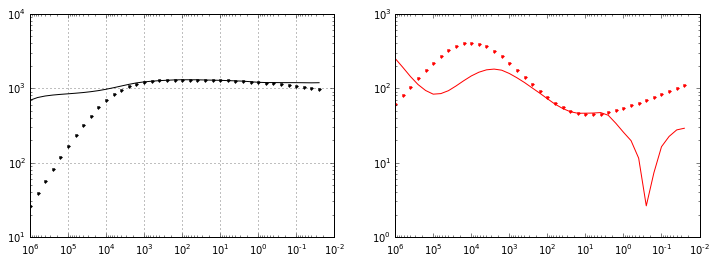

<function __main__.fitfun>

In [137]:
interact(fitfun, R0=FloatText(value=R0),\
    Rh=FloatText(value=pRh), Qh=FloatText(value=pQh), Ph=FloatText(value=Ph),
    Rl=FloatText(value=1.), Ql=FloatText(value=pQl), Pl=FloatText(value=Pl),        
    Re=FloatText(value=Re), Qe=FloatText(value=Qe), Pef=FloatText(value=Pef), Pei=FloatText(value=Pei))

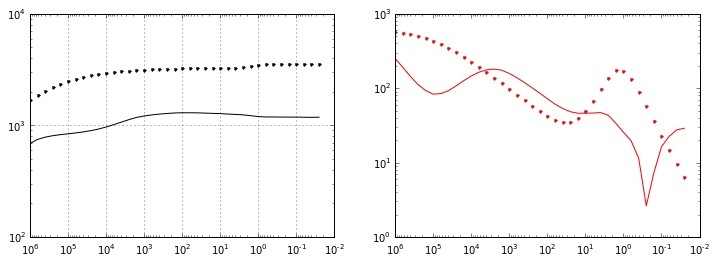

<function __main__.fitfun>

In [23]:
interact(fitfun, R0=FloatText(value=3290),\
    Rh=FloatText(value=34.7), Qh=FloatText(value=3.97e-7), Ph=FloatText(value=0.422),
    Rl=FloatText(value=1e10), Ql=FloatText(value=1.1e-6), Pl=FloatText(value=0.364),        
    Re=FloatText(value=264), Qe=FloatText(value=4.75e-4), Pef=FloatText(value=1.), Pei=FloatText(value=1.17))

In [24]:
f0peak = lambda R, Q, P: (R*Q)**(-1./P)/np.pi/2.
taupeak = lambda R, Q, P: (R*Q)**(1./P)
rhoinf = lambda rhom, rhol, rho0: 1./(1./rho0+1./rhom+1./rhol)
charg = lambda rhoinf, rho0: (rho0-rhoinf) / rhoinf

def TKCColeColeParallel(frequency, R0, Rh, Qh, Ph, Rl, Ql, Pl, geom=1.):
    fpeakl = f0peak(Rl, Ql, Pl)
    rhol = CPEfunSeries(Rl, Ql, Pl, frequency)*geom
    rho0 = R0*geom
    rhoinf = 1./(1./R0+1./Rl)
    m = (rho0-rhoinf)/rho0
    rho = 1./(1./rho0+1./rhol)
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 3))
    ax[0].semilogx(frequency, rho.real, 'k-', lw=2)
    ax1 = ax[0].twinx()
    ax1.semilogx(frequency, (rho.imag), 'k--', lw=2)
    ax1.invert_yaxis()
    ax[0].grid(True)
    ax[1].plot(rho.real, rho.imag, 'k-')

    ax[1].invert_yaxis()
    ax[1].grid(True)

    
    print "R0 = ", rho0
    print "Rinf = ", rhoinf
    print "Chargeability = ", m    
    print "Tau = ", 1./fpeakl  
    return 

R0 =  91.44
Rinf =  3371.42857143
Chargeability =  -35.8703912011
Tau =  0.00256689708585


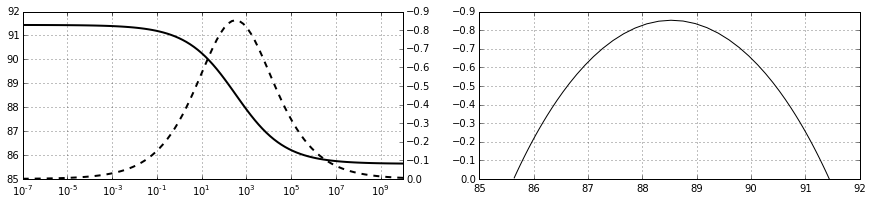

In [17]:
R0 = 3600
Rh, Qh, Ph = 34.7, 3.97e-7, 0.422
Rl, Ql, Pl = 5.31e4, 1.1e-6, 0.364
# frequency = temp[:,0].copy()
frequency = np.logspace(-7, 10, 101)
TKCColeColeParallel(frequency, R0, Rh, Qh, Ph, Rl, Ql, Pl, geom = 0.0254)

(1.5569720885901273, 1.9486571969681217)

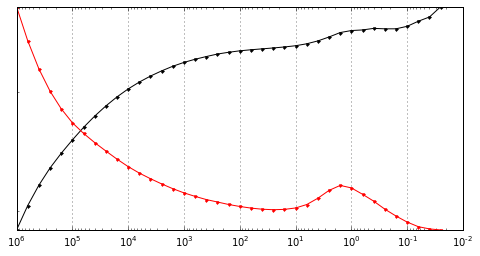

In [18]:
import scipy as sp
amp = lambda x, y: np.sqrt(x**2+y**2)
fig = plt.figure(figsize = (8, 4))
frequency = temp[:,0].copy()
ax = plt.subplot(111)
ax1 = ax.twinx()
ax.loglog(temp[:,0], amp(temp[:,4], temp[:,5]), 'k.-')
ax1.loglog(temp[:,0], sp.arctan2(temp[:,4], temp[:,5]), 'r.-')
ax.invert_xaxis()
ax.grid(True)
ax.set_ylim(amp(temp[:,4], temp[:,5]).min(), amp(temp[:,4], temp[:,5]).max() )
ax1.set_ylim(sp.arctan2(temp[:,4], temp[:,5]).min(), sp.arctan2(temp[:,4], temp[:,5]).max() )